# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [2]:
df = pd.read_csv("housing2.csv")

print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [4]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

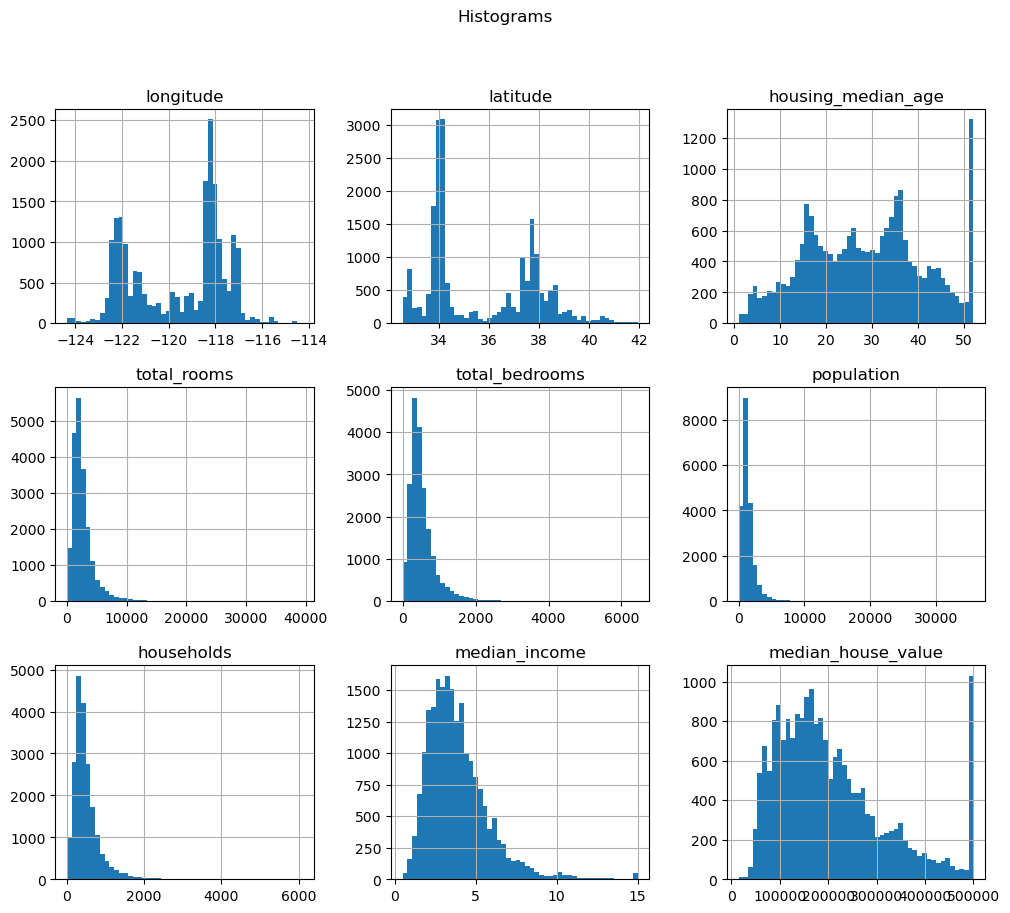

In [5]:
df.hist(figsize=(12, 10), bins=50)
plt.suptitle("Histograms")
plt.show()


#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [6]:
print(df.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [7]:
# replece the null with the mean 
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [8]:
print(df.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [9]:
df['rooms_per_household'] = df['total_rooms'] / df['households']


In [10]:
df['population_per_household'] = df['population'] / df['households']


In [11]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']


3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [12]:
print(df['rooms_per_household'].describe())


count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: rooms_per_household, dtype: float64


In [13]:
Q1 = df['rooms_per_household'].quantile(0.25)
Q3 = df['rooms_per_household'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"Lower: {lower}, Upper: {upper}")


Lower: 2.023219161170969, Upper: 8.469878027106942


In [14]:
outliers = df[(df['rooms_per_household'] > upper) | (df['rooms_per_household'] < lower)]

# Drop it
df.drop(outliers.index, inplace=True)



In [15]:
print(df['rooms_per_household'].describe())


count    20129.000000
mean         5.238801
std          1.154132
min          2.032738
25%          4.426656
50%          5.197183
75%          5.983759
max          8.469738
Name: rooms_per_household, dtype: float64


# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

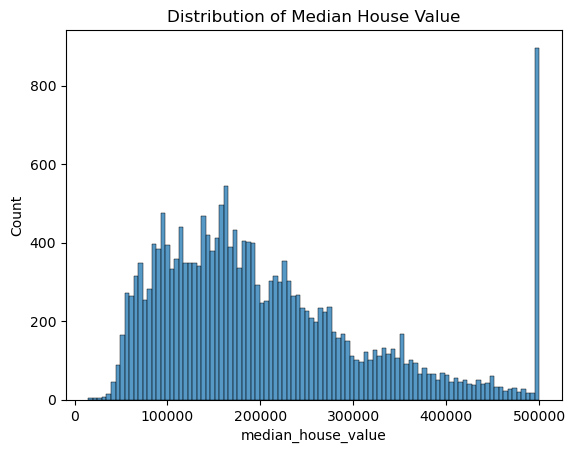

In [16]:
sns.histplot(df['median_house_value'], bins=100)
plt.title("Distribution of Median House Value")
plt.show()


2. Check out what variables correlates the most with "median house value"

In [17]:
corr_matrix = df.select_dtypes(include=['number']).corr()
print(corr_matrix['median_house_value'])
# we can see the median_income have a high corr

longitude                  -0.047307
latitude                   -0.141531
housing_median_age          0.109270
total_rooms                 0.137431
total_bedrooms              0.059069
population                 -0.025265
households                  0.070609
median_income               0.681675
median_house_value          1.000000
rooms_per_household         0.316198
population_per_household   -0.029470
bedrooms_per_room          -0.226380
Name: median_house_value, dtype: float64


3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

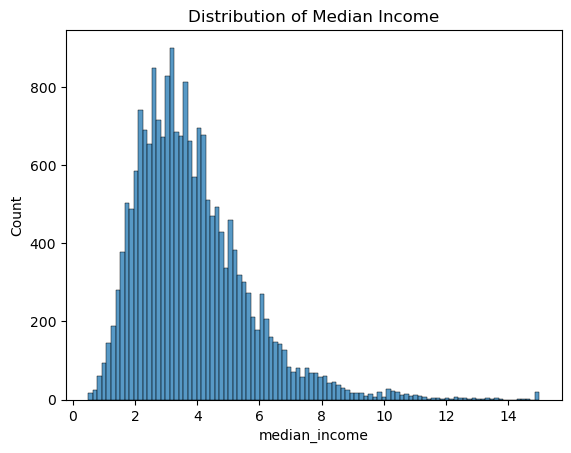

In [18]:
sns.histplot(df['median_income'], bins=100)
plt.title("Distribution of Median Income")
plt.show()

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

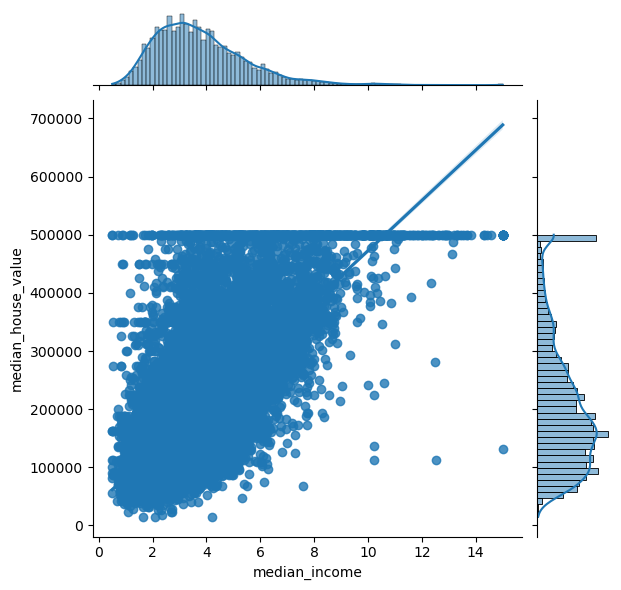

In [19]:
sns.jointplot(x=df['median_income'], y=df['median_house_value'], kind="reg")
plt.show()
# we can see there is Strong positive correlation.


5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

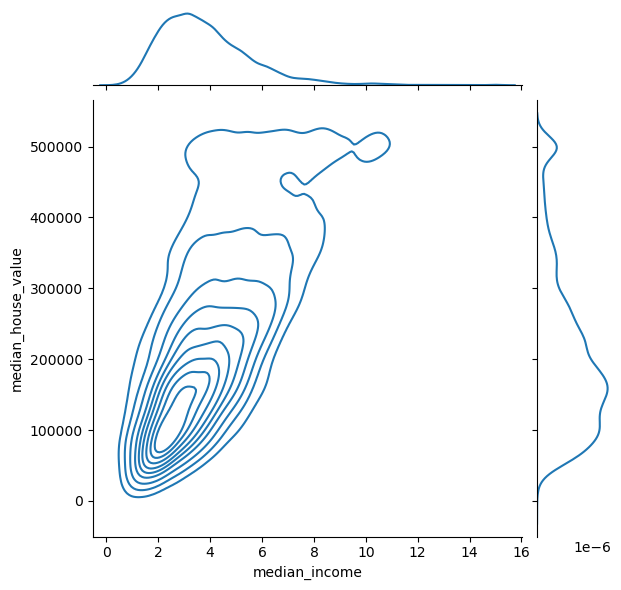

In [20]:
sns.jointplot(x=df['median_income'], y=df['median_house_value'], kind="kde")
plt.show()
# show smooth plot

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [21]:
points = [0, 0.25, 0.5, 0.75, 0.95, 1]
labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"]

df['income_cat'] = pd.qcut(df['median_income'], q=points, labels=labels)

print(df['income_cat'].value_counts())


income_cat
Below_Average    5035
Low              5033
Above_Average    5032
High             4022
Very High        1007
Name: count, dtype: int64


2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

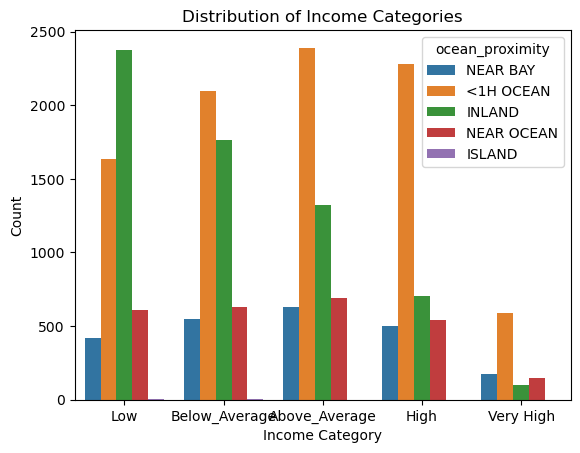

In [22]:
sns.countplot(x='income_cat', data=df, hue='ocean_proximity')
plt.title("Distribution of Income Categories")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()
# we can see that when (income) is high or less most of them <1h ocean ,  and very little in the island

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

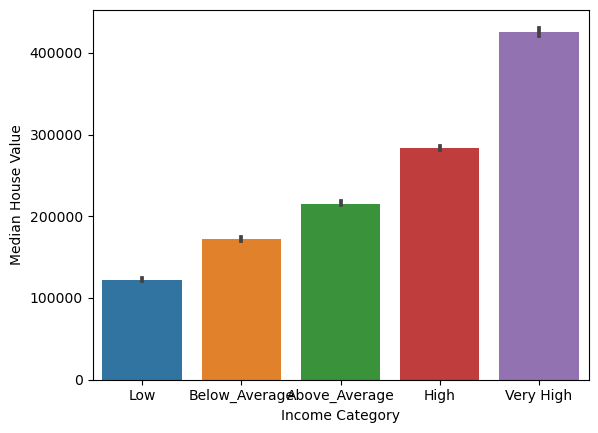

In [23]:
sns.barplot(x='income_cat', y='median_house_value', data=df)
plt.xlabel("Income Category")
plt.ylabel("Median House Value")
plt.show()
# yes that the median house value it is impacted by the income and the location .

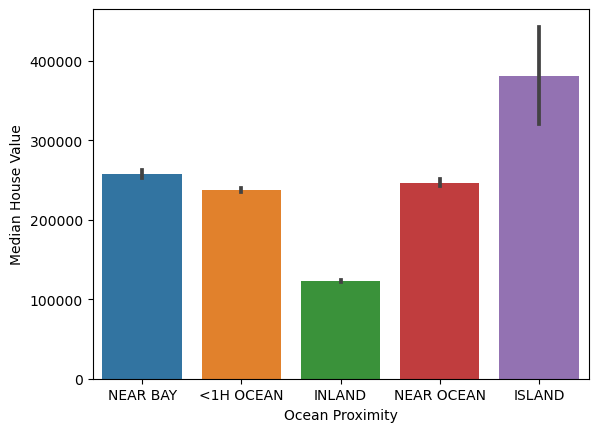

In [27]:
sns.barplot(x='ocean_proximity', y='median_house_value', data=df)
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.show()


4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [33]:
pivot_df = df.pivot_table(index='income_cat', columns='ocean_proximity', values='median_house_value', aggfunc='count')

pivot_df = pivot_df.drop('ISLAND', axis=1)



In [34]:
print(pivot_df)


ocean_proximity  <1H OCEAN  INLAND  NEAR BAY  NEAR OCEAN
income_cat                                              
Low                   1637    2372       417         606
Below_Average         2096    1760       548         627
Above_Average         2391    1320       632         689
High                  2278     702       500         542
Very High              590      97       171         149


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

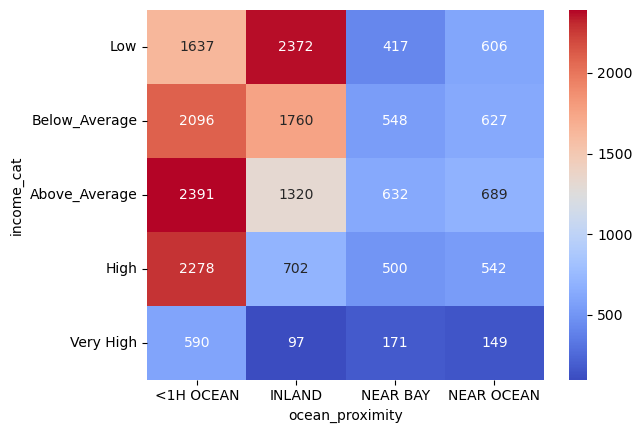

In [35]:
sns.heatmap(pivot_df, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.show()


# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [36]:
df = df.drop(columns='income_cat')


2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [37]:
import scipy.stats as stats

In [38]:
numeric = df.select_dtypes(include=['float64']).columns

z_scored = df[numeric].apply(lambda x: stats.zscore(x))

print(z_scored.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.323746  1.059725            0.974178    -0.812163       -0.986113   
1  -1.318748  1.050333           -0.624624     2.095980        1.381961   
2  -1.328745  1.045637            1.853519    -0.537669       -0.838260   
3  -1.333743  1.045637            1.853519    -0.627920       -0.729188   
4  -1.333743  1.045637            1.853519    -0.462850       -0.620116   

   population  households  median_income  median_house_value  \
0   -0.985778   -0.988739       2.512102            2.173386   
1    0.850640    1.660745       2.498820            1.345764   
2   -0.832081   -0.855218       1.916213            1.289476   
3   -0.777315   -0.745259       1.015348            1.194488   
4   -0.771132   -0.640536       0.012583            1.202404   

   rooms_per_household  population_per_household  bedrooms_per_room  
0             1.512279                 -0.050193          -1.076563  
1             0.865898  

3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [39]:
dum = pd.get_dummies(df['ocean_proximity'], drop_first=True)

print(dum.head())


   INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0   False   False      True       False
1   False   False      True       False
2   False   False      True       False
3   False   False      True       False
4   False   False      True       False


4. Save our predicting variable to `y`.

In [40]:
y = df['median_house_value']


5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [41]:
X = pd.concat([z_scored, dum], axis=1)

print(X.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.323746  1.059725            0.974178    -0.812163       -0.986113   
1  -1.318748  1.050333           -0.624624     2.095980        1.381961   
2  -1.328745  1.045637            1.853519    -0.537669       -0.838260   
3  -1.333743  1.045637            1.853519    -0.627920       -0.729188   
4  -1.333743  1.045637            1.853519    -0.462850       -0.620116   

   population  households  median_income  median_house_value  \
0   -0.985778   -0.988739       2.512102            2.173386   
1    0.850640    1.660745       2.498820            1.345764   
2   -0.832081   -0.855218       1.916213            1.289476   
3   -0.777315   -0.745259       1.015348            1.194488   
4   -0.771132   -0.640536       0.012583            1.202404   

   rooms_per_household  population_per_household  bedrooms_per_room  INLAND  \
0             1.512279                 -0.050193          -1.076563   False   
1     

# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

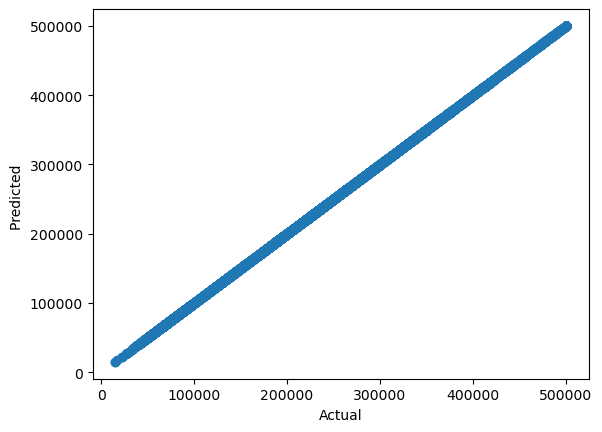

In [47]:
y_train_pred = model.predict(X_train)

plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted ')
plt.show()
# fit good with liner relationship

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [25]:
from sklearn import metrics

In [48]:
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error: {mse_train}")

Mean Squared Error: 4.595829660941906e-20


In [49]:
r2_train = metrics.r2_score(y_train, y_train_pred)
print(f"R2-score: {r2_train}")

R2-score: 1.0


In [ ]:
#so the mse have lower value witch is good and the r2 tell us that the model perfectly explains the variance in the data and fit good.

#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

In [51]:
y_test_pred = model.predict(X_test)

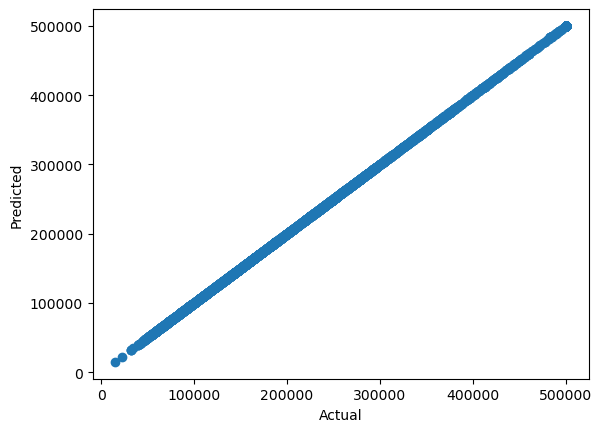

In [52]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

2. Print the mean_squared_error and R^2-score again. What has happened?

In [53]:
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse_test}")

Mean Squared Error: 4.546148485690345e-20


In [54]:
r2_test = metrics.r2_score(y_test, y_test_pred)
print(f"R2-score: {r2_test}")

R2-score: 1.0


In [ ]:
# the result is too close from the train

3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [55]:
rmse_test = np.sqrt(mse_test)

print(f"Root Mean Squared Error: {rmse_test}")


Root Mean Squared Error: 2.1321699007561157e-10


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

In [56]:
new_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

In [57]:
absolute_errors = abs(new_df['Actual'] - new_df['Predicted'])

print(absolute_errors.head())

10501    1.164153e-10
6876     5.820766e-11
15750    5.820766e-10
8466     1.455192e-10
10385    5.820766e-11
dtype: float64


3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

In [58]:
mae = absolute_errors.mean()
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.6977595881560343e-10


# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf = RandomForestRegressor(random_state=42)


In [62]:
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

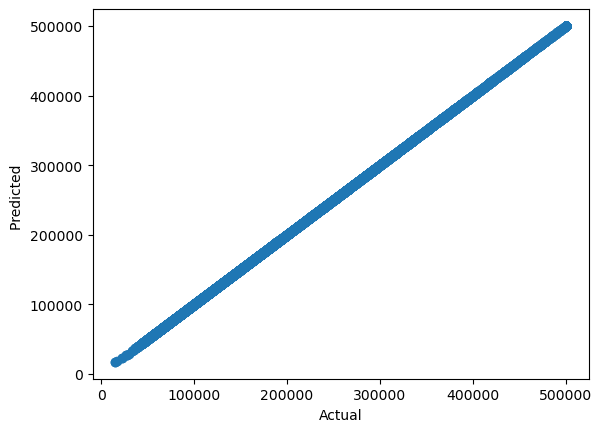

In [63]:
y_train_pred = rf.predict(X_train)

plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted ')
plt.show()

In [64]:
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error: {mse_train}")

Mean Squared Error: 1278.3757282493943


In [65]:
r2_train = metrics.r2_score(y_train, y_train_pred)
print(f"R2-score: {r2_train}")

R2-score: 0.9999999010716359


2. Make prediction on the test data and evaluate you results.

In [70]:
y_test_pred = rf.predict(X_test)

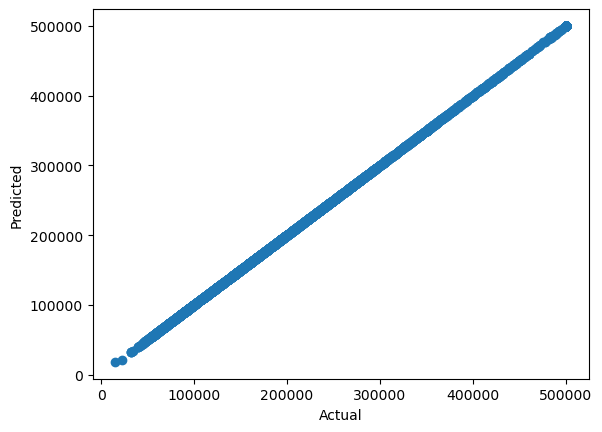

In [71]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [72]:
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse_test}")

Mean Squared Error: 5394.481057550922


In [73]:
r2_test = metrics.r2_score(y_test, y_test_pred)
print(f"R2-score: {r2_test}")

R2-score: 0.9999995833320989


In [74]:
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error: {rmse_test}")

Root Mean Squared Error: 73.44713103689566
